In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.shape

(500, 9)

In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


OUR input columns needs scaling . we are goona use min-max scalling

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns=["Serial No."],inplace=True)

In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [13]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [15]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data Scaling
This section of the code focuses on scaling the features in your dataset. Scaling is a common data preprocessing step in machine learning, particularly when using algorithms that are sensitive to the magnitude of features.

Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Use code with caution
This line imports the MinMaxScaler class from the sklearn.preprocessing module. The MinMaxScaler is a specific type of scaler that transforms features by scaling each feature to a given range, typically between 0 and 1. This scaling is done by subtracting the minimum value and dividing by the range (max - min).

Creating a MinMaxScaler Instance
scaler = MinMaxScaler()
Use code with caution
Here, an instance of the MinMaxScaler is created and assigned to the variable scaler. This object will be used to perform the scaling operation.

Fitting and Transforming the Training Data
X_train_scaled = scaler.fit_transform(X_train)
Use code with caution
This is a crucial step. The fit_transform() method is called on the scaler object using the training data X_train.

fit(): The fit() part of this method calculates the minimum and maximum values for each feature in the X_train dataset. These calculated values are then stored within the scaler object.
transform(): The transform() part then uses the minimum and maximum values it learned during the fit step to scale each feature in X_train to the desired range (0 to 1 in this case). The resulting scaled training data is stored in the variable X_train_scaled.
Transforming the Test Data
X_test_scaled = scaler.transform(X_test)
Use code with caution
Finally, the transform() method is called on the scaler object using the test data X_test. It's important to note that we only use transform() here, not fit_transform(). We use the minimum and maximum values that were learned from the training data (during the fit() step on X_train) to scale the test data. This prevents data leakage from the test set into the training process, which is a fundamental principle in machine learning. The scaled test data is stored in the variable X_test_scaled.

After this section of the code, you will have two new arrays: X_train_scaled containing the scaled features for the training set, and X_test_scaled containing the scaled features for the test set. These scaled features are now ready to be used as input for your machine learning model.

Sources
Rate this answer
i am still confuse on the use of fit_tranfrom and transform

Understanding fit_transform and transform
It's common to find the distinction between fit_transform and transform a bit confusing at first. Let's break it down with an analogy.

Imagine you have a recipe for baking a cake.

fit - Learning the Recipe
scaler.fit(X_train)
Use code with caution
Think of fit() as the part where you learn the recipe. When you call scaler.fit(X_train), the MinMaxScaler looks at your training data (X_train) and calculates the minimum and maximum values for each column (each feature). It's figuring out the "ingredients" (the range of values) needed for scaling. These minimum and maximum values are like the instructions in the recipe that tell you how much of each ingredient to use. Importantly, fit() only learns; it doesn't change the data yet.

transform - Baking the Cake
scaler.transform(X_train)
Use code with caution
Now, transform() is like the part where you bake the cake using the recipe you just learned. When you call scaler.transform(X_train), the MinMaxScaler uses the minimum and maximum values it learned during the fit() step to actually scale the data in X_train. It applies the scaling "formula" to each data point. The result is the scaled data.

fit_transform - Learning and Baking at Once
scaler.fit_transform(X_train)
Use code with caution
fit_transform() is simply a convenience method that combines the fit() and transform() steps. It's like learning the recipe and baking the cake immediately afterwards. It's often used on the training data because you need to both learn the scaling parameters (from the training data) and then apply that scaling to the training data itself.

Why Not fit_transform on Test Data?
X_test_scaled = scaler.transform(X_test)
Use code with caution
Now, why do we only use transform() on the test data (X_test)? This is crucial for preventing data leakage.

Imagine you were baking a cake for a competition. You learn your recipe (from the training data). You bake your competition cake (transform the training data). When you need to bake another cake later (the test data), you use the same recipe you learned initially. You do not create a new recipe based on the ingredients you have for this new cake.

Similarly, when scaling test data, you must use the minimum and maximum values that were learned only from the training data. If you were to use fit_transform() on the test data, the scaler would learn the min/max values from the test data itself. This would mean your scaling is influenced by information from the test set, which can lead to overly optimistic performance estimates and a model that doesn't generalize well to truly unseen data.

In summary:

Use fit_transform() on your training data (X_train) to learn the scaling parameters (min/max values) and scale the training data in one go.
Use transform() on your test data (X_test) to scale the test data using the scaling parameters that were learned only from the training data.
This ensures that the scaling applied to your test data is consistent with the scaling applied to your training data, based solely on the characteristics of the training data.



In [22]:
 X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss = "mean_squared_error",optimizer="Adam")

In [35]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.3298 - val_loss: 0.2927
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2441 - val_loss: 0.1941
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1529 - val_loss: 0.1118
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0838 - val_loss: 0.0605
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0421 - val_loss: 0.0386
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - val_loss: 0.0331
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0294 - val_loss: 0.0316
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0262 - val_loss: 0.0297
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0247 - val_loss: 0.0279
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0229 - val_loss: 0.0262
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0220 - val_loss: 0.0248
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

In [36]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7616025425606464

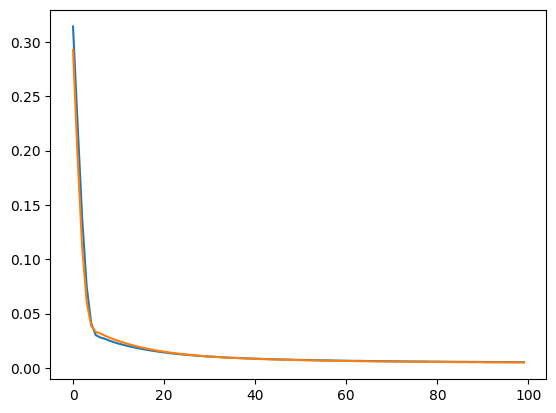

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()